### Do not Run this code I had already Trained the model just run only COMPUTER VISION CODE BELOW

In [ ]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf

### Preprocessing

In [ ]:
from zipfile import *
zip= ZipFile('/content/drive/My Drive/Datasets/full2.zip','r', ZIP_STORED)
zip.extractall()

In [ ]:
names=zip.namelist()
len(names)

304

In [ ]:
for dirpath,dirnames,filenames in os.walk('./full2'):
    print(dirpath)
    #print(dirnames)
    #print(len(filenames))


./full2
./full2/neutral
./full2/angry
./full2/sad
./full2/happy


In [ ]:
images=[]
exp=[]
for dirpath,dirnames,filenames in os.walk('./full2'):
    print(dirpath)
    #print(filenames)
    #dirpath=dirpath.replace('C:/Users/Saikrishna/Desktop/Datasets/images/full\\','')
    #d[dirpath]=filenames
    
    size=4002
    stop=1
    for im in filenames:
        #print('filename',dirpath+'\\'+im)
        if stop<=4002: 
          img= cv.imread(dirpath+'/'+im,cv.IMREAD_COLOR)
          #img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
          images.append(img)
          exp.append(dirpath.replace('./full2/',''))
          stop+=1

#exp=exp[1:]
#print(images)


./full2
./full2/neutral
./full2/angry
./full2/sad
./full2/happy


In [ ]:
print(len(images))
print(len(exp))

300
300


In [ ]:
imgs=np.array(images)

In [ ]:
#imgs

In [ ]:
imgs=imgs/255.0

In [ ]:
imgs.shape

(300, 100, 100, 3)

In [ ]:
imgs.min()

0.0

In [ ]:
imgs.max()

1.0

### Y to categorical

In [ ]:
from keras.utils import np_utils
cat_temp=exp.copy()
labels=list(set(cat_temp))
print(labels)
for i in range(len(cat_temp)):
  cat_temp[i]=labels.index(cat_temp[i])

print(exp)
cat= np_utils.to_categorical(cat_temp)
cat=np.array(cat)
print(cat)

['neutral', 'happy', 'angry', 'sad']
['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'a

In [ ]:
cat.ndim

2

In [ ]:
np.array(range(6)).reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])

### Train Val Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test=train_test_split(imgs, cat, train_size=0.9)

In [ ]:
x_train, x_val, y_train, y_val=train_test_split(x_train_val, y_train_val, train_size=0.888)

In [ ]:
#y_train

In [ ]:
print('x_train=',len(x_train))
print('x_val=',len(x_val))
print('x_test=',len(x_test))

x_train= 239
x_val= 31
x_test= 30


In [ ]:
print('y_train=',len(y_train))
print('y_val=',len(y_val))
print('y_test=',len(y_test))

y_train= 239
y_val= 31
y_test= 30


In [ ]:
print(len(images))
print(len(exp))

300
300


In [ ]:
print(x_test.shape)

(30, 100, 100, 3)


In [ ]:
print(y_test.shape)

(30, 4)


### Convolutional Neural Network

Intialising the CNN

In [ ]:
cnn=tf.keras.models.Sequential()

Step-1 Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[100,100,3]))

Step-2 Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

Adding a second conv layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

Step-3 Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())
#cnn.add(tf.keras.layers.Dropout(0.5))

Step-4 Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(80, activation='relu'))
cnn.add(tf.keras.layers.Dense(80, activation='relu'))

Step 5- Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

### Training the CNN

Compiling the CNN

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Adding Call back function

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping()

Training the CNN

In [ ]:
NUM_EPOCHS=10

cnn.fit(x=x_train, y=y_train, 
        validation_data=(x_val, y_val), 
        epochs=NUM_EPOCHS,
        verbose=2,
        batch_size=8,
        callbacks=[early_stopping])

Epoch 1/10
30/30 - 5s - loss: 1.0668 - accuracy: 0.4812 - val_loss: 0.7293 - val_accuracy: 0.7097
Epoch 2/10
30/30 - 5s - loss: 0.6723 - accuracy: 0.7155 - val_loss: 0.6749 - val_accuracy: 0.7419
Epoch 3/10
30/30 - 5s - loss: 0.5401 - accuracy: 0.7824 - val_loss: 0.6628 - val_accuracy: 0.7097
Epoch 4/10
30/30 - 5s - loss: 0.3596 - accuracy: 0.8703 - val_loss: 0.9145 - val_accuracy: 0.6129


### Test the model

In [ ]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.9441 - accuracy: 0.5333


In [ ]:
print('Test loss:',test_loss,'Test accuracy', test_accuracy)

Test loss: 0.9441090822219849 Test accuracy 0.5333333611488342


In [ ]:
#from tf.keras.models import load_model
cnn.save('emotion-model.h5')

In [ ]:
from keras.models import load_model
import cv2 as cv

In [ ]:
model=load_model('/content/emotion-model.h5')

In [ ]:
img=cv.imread('/content/images38.jpg',cv.IMREAD_COLOR)
#img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
img=np.reshape(img,(1,100,100,3))
img.shape
result=model.predict(img)

In [ ]:
x=tf.keras.backend.argmax(result)
labels[tf.keras.backend.eval(x)[0]]

'sad'

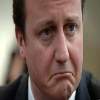

In [ ]:
from google.colab.patches import cv2_imshow
img=img.reshape(100,100,3)
cv2_imshow(img)

## Computer Vision code Run in Computer

In [ ]:
import numpy as np
import os
import cv2 as cv

In [ ]:
import tensorflow as tf
from keras.models import load_model

In [ ]:
model=load_model('emotion-model-final.h5')
labels=['neutral', 'happy', 'angry', 'sad']
face_cascade= cv.CascadeClassifier('haarcascade_frontalface_default.xml')
cap=cv.VideoCapture(0)

while True:
    ret, frame= cap.read()
    
    gray= cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.1, 4)
    #only_face=np.zeros(shape=(600,600,3))
    for (x,y,w,h) in faces:
        cv.rectangle(frame, (x,y),(x+w, y+h), (255,0,0),3)
        #only_face=frame[y:y+w, x:x+h]
        model_face= frame[y:y+w, x:x+h]/255.0
        resized_frame= np.resize(model_face, (1,100,100,3))
        resized_reshape_frame= resized_frame.reshape(1,100,100,3)
        
        result=model.predict(resized_reshape_frame)
        
        zz=tf.keras.backend.argmax(result,axis=1)
        emotion=labels[tf.keras.backend.eval(zz)[0]]
        #print(result.round(1),'--',emotion)
        #print(emotion)
        frame=cv.putText(frame,emotion,(x-4,y-4),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    #print(resized_reshape_frame)
    cv.imshow('Em', frame)
    #cv.imshow('model_face', only_face)
    
    if cv.waitKey(1)==ord('q'):
        break

cap.release()
cv.destroyAllWindows()